# Quantum particle in a maze

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import null_space

## Creating random mazes

In [390]:
# Creating weighted graph
N = 10
vertices = np.arange(N*N).reshape(N,N)

# Constructing graph Laplacian
diags = [[1]*(N**2-N), ([1,1,0]*N**2)[:N**2-1], ([1,1,0]*N**2)[:N**2-1], [1]*(N**2-N)]
ks = [-N, -1, 1, N]

Laplacian = sum([np.diag(diags[i], ks[i]) for i in range(len(diags))])

# Randomizing weights
Laplacian = Laplacian * np.random.random(Laplacian.shape)**2

# Symmetrizing
Laplacian = Laplacian + Laplacian.T 

# Adding degree matrix
Laplacian = np.diag(Laplacian.sum(axis=0)) - Laplacian

In [391]:
# Applying Kruskal's algorithm

# Since Laplacian is symmetric, we only need the triangular part for the algorithm
graphLap = np.tri(N*N) * Laplacian
mazeLap = np.zeros(Laplacian.shape)
while (null_space(mazeLap).size > 0) and (graphLap.sum() > 0) :
    # Find edge with minimum weight
    r, c = np.where(graphLap == np.min(graphLap[np.nonzero(graphLap)]))
    r, c = r[0], c[0]

    # Remove edge from graph laplacian
    graphLap[r,c] = 0

    # If removed edge connects two different trees then add it to mazeLap
    mazeLap_new = mazeLap.copy()
    mazeLap_new[r,c] = mazeLap_new[c,r] = 1
    mazeLap_new[c,c] -= 1
    mazeLap_new[r,r] -= 1
    

    # Here we use the null space condition to check the connectivity of the graph. Note: This is not particularly efficient, probably better to use Union-Find instead
    if null_space(mazeLap).size > null_space(mazeLap_new).size :
        mazeLap = mazeLap_new

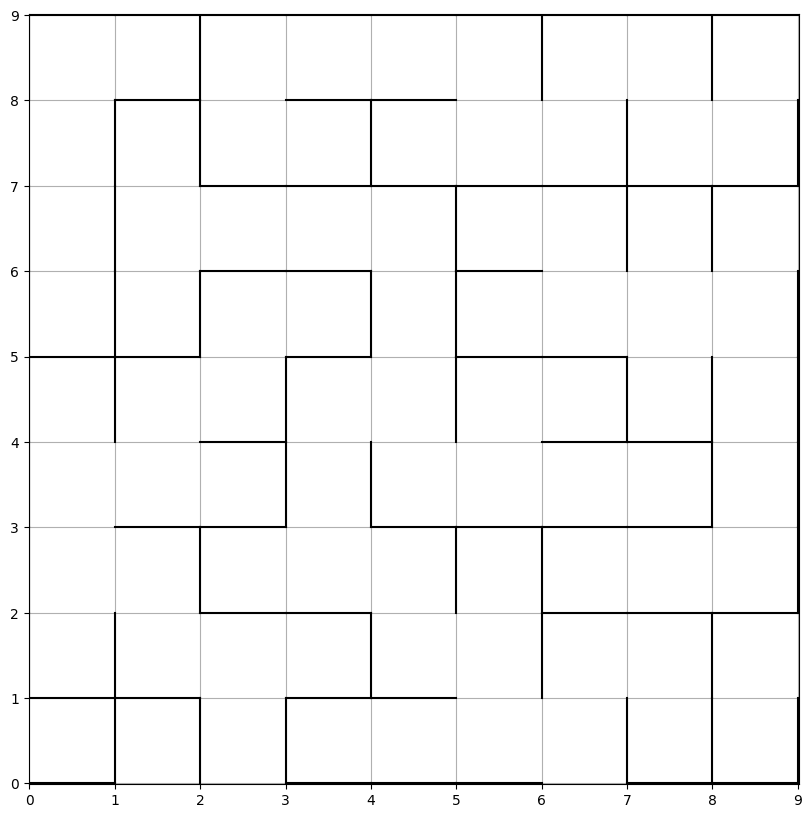

In [436]:
import numpy as np
import matplotlib.pyplot as plt

N = 10

# Define functions for union-find data structure
def find(node, parent):
    if parent[node] == node:
        return node
    
    parent[node] = find(parent[node], parent)
    return parent[node]

def union(a, b, parent, rank):
    rootA = find(a, parent)
    rootB = find(b, parent)
    if rootA != rootB:
        if rank[rootA] > rank[rootB]:
            parent[rootB] = rootA
        else:
            parent[rootA] = rootB
            if rank[rootA] == rank[rootB]: rank[rootB] += 1

# Generate list of walls and initialize sets
walls = []
for i in range(N):
    for j in range(N):
        if i < N-1:
            walls.append(((i, j), (i+1, j)))
        if j < N-1:
            walls.append(((i, j), (i, j+1)))
np.random.shuffle(walls)

parent = {(i, j): (i, j) for i in range(N) for j in range(N)}
rank = {(i, j): 0 for i in range(N) for j in range(N)}
maze = []

# Apply Kruskal's algorithm
for (a, b) in walls:
    if find(a, parent) != find(b, parent):
        maze.append((a, b))
        union(a, b, parent, rank)

# Plotting maze
f, ax = plt.subplots(figsize=(10, 10))
for (a, b) in maze:
    ax.plot([a[1], b[1]], [N-a[0]-1, N-b[0]-1], color='k')

ax.set_xlim(-0.01, N-0.99)
ax.set_ylim(-0.01, N-0.99)
ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))
ax.grid(which='both')
ax.set_aspect('equal')

plt.show()


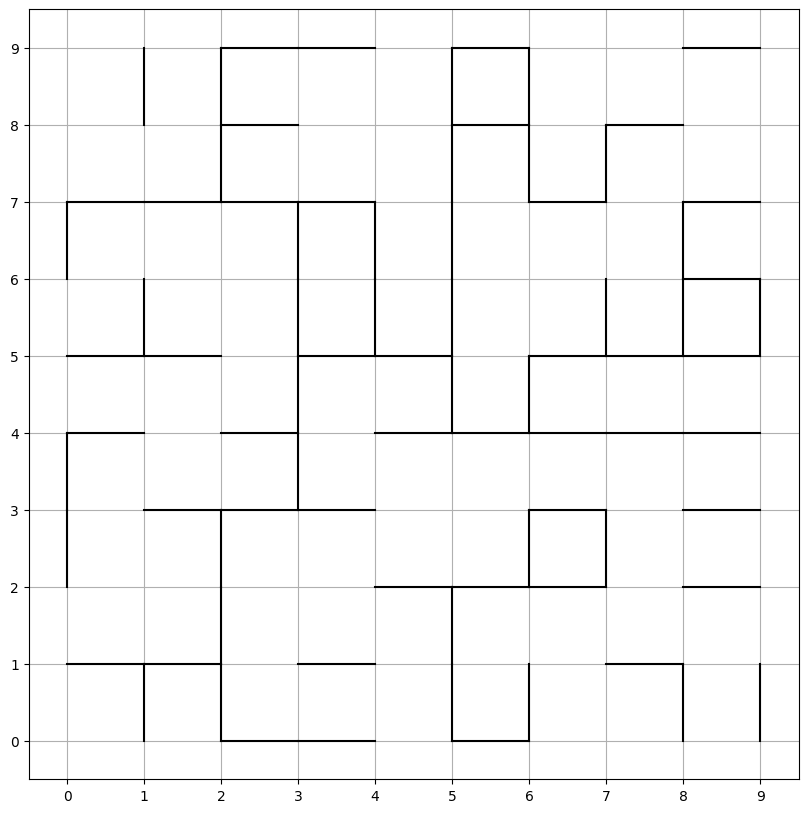

In [437]:
import numpy as np
import matplotlib.pyplot as plt

N = 10

# Define functions for union-find data structure
def find(node, parent):
    if parent[node] == node:
        return node
    parent[node] = find(parent[node], parent)
    return parent[node]

def union(a, b, parent, rank):
    rootA = find(a, parent)
    rootB = find(b, parent)
    if rootA != rootB:
        if rank[rootA] > rank[rootB]:
            parent[rootB] = rootA
        else:
            parent[rootA] = rootB
            if rank[rootA] == rank[rootB]: rank[rootB] += 1

# Generate list of walls and initialize sets
walls = []
for i in range(N):
    for j in range(N):
        if i < N-1:
            walls.append(((i, j), (i+1, j)))
        if j < N-1:
            walls.append(((i, j), (i, j+1)))
np.random.shuffle(walls)

parent = {(i, j): (i, j) for i in range(N) for j in range(N)}
rank = {(i, j): 0 for i in range(N) for j in range(N)}
removed_walls = set()

# Apply Kruskal's algorithm
for (a, b) in walls:
    if find(a, parent) != find(b, parent):
        removed_walls.add((a, b))
        union(a, b, parent, rank)

# Plotting maze
f, ax = plt.subplots(figsize=(10, 10))
for (a, b) in walls:
    if (a, b) not in removed_walls and (b, a) not in removed_walls:
        ax.plot([a[1], b[1]], [N-a[0]-1, N-b[0]-1], color='k')

ax.set_xlim(-0.5, N-0.5)
ax.set_ylim(-0.5, N-0.5)
ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))
ax.grid(which='both')
ax.set_aspect('equal')

plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt

import random

def get_next_pos(pos, visited, N):
    options = []
    if pos[0] > 0 and (pos[0]-1, pos[1]) not in visited:
        options.append((pos[0]-1, pos[1]))
    if pos[0] < N-1 and (pos[0]+1, pos[1]) not in visited:
        options.append((pos[0]+1, pos[1]))
    if pos[1] > 0 and (pos[0], pos[1]-1) not in visited:
        options.append((pos[0], pos[1]-1))
    if pos[1] < N-1 and (pos[0], pos[1]+1) not in visited:
        options.append((pos[0], pos[1]+1))
    return random.choice(options) if options else None


N = 10
visited = set()
edges = []
start = (0, 0)

while len(visited) < N*N:
    pos = start
    path = [start]
    while pos:
        visited.add(pos)
        next_pos = get_next_pos(pos, visited, N)
        if next_pos:
            path.append(next_pos)
            edges.append((pos, next_pos))
        pos = next_pos
    unvisited = [(i, j) for i in range(N) for j in range(N) if (i, j) not in visited]
    if unvisited:
        start = random.choice(unvisited, 1)[0]
    else:
        break

# Plotting
f, ax = plt.subplots(figsize=(10, 10))
for (a, b) in edges:
    ax.plot([a[1], b[1]], [N-a[0]-1, N-b[0]-1], color='k')

ax.set_xlim(-0.5, N-0.5)
ax.set_ylim(-0.5, N-0.5)
ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))
ax.grid(which='both')
ax.set_aspect('equal')

plt.show()


TypeError: choice() takes 2 positional arguments but 3 were given

In [5]:
N = 10 
walls = []
for i in range(N):
    for j in range(N):
        if i < N-1:
            walls.append(((i, j), (i+1, j)))
        if j < N-1:
            walls.append(((i, j), (i, j+1)))
np.random.shuffle(walls)

In [8]:
walls

[((4, 7), (5, 7)),
 ((6, 1), (7, 1)),
 ((8, 7), (8, 8)),
 ((7, 4), (7, 5)),
 ((5, 6), (5, 7)),
 ((0, 8), (0, 9)),
 ((1, 0), (2, 0)),
 ((0, 4), (0, 5)),
 ((0, 1), (0, 2)),
 ((1, 8), (2, 8)),
 ((1, 7), (1, 8)),
 ((8, 0), (8, 1)),
 ((6, 6), (7, 6)),
 ((6, 0), (6, 1)),
 ((2, 2), (2, 3)),
 ((7, 2), (7, 3)),
 ((5, 4), (6, 4)),
 ((8, 6), (9, 6)),
 ((2, 3), (2, 4)),
 ((5, 8), (6, 8)),
 ((7, 7), (8, 7)),
 ((4, 0), (4, 1)),
 ((7, 8), (8, 8)),
 ((7, 1), (8, 1)),
 ((7, 0), (7, 1)),
 ((3, 4), (4, 4)),
 ((8, 1), (9, 1)),
 ((0, 3), (1, 3)),
 ((7, 6), (8, 6)),
 ((1, 1), (2, 1)),
 ((7, 5), (8, 5)),
 ((3, 4), (3, 5)),
 ((3, 3), (3, 4)),
 ((2, 1), (3, 1)),
 ((6, 5), (6, 6)),
 ((4, 4), (5, 4)),
 ((8, 3), (8, 4)),
 ((0, 2), (1, 2)),
 ((7, 5), (7, 6)),
 ((5, 3), (6, 3)),
 ((2, 0), (3, 0)),
 ((5, 0), (5, 1)),
 ((4, 2), (4, 3)),
 ((0, 3), (0, 4)),
 ((6, 2), (6, 3)),
 ((8, 7), (9, 7)),
 ((4, 6), (5, 6)),
 ((0, 5), (1, 5)),
 ((6, 4), (6, 5)),
 ((2, 2), (3, 2)),
 ((9, 8), (9, 9)),
 ((0, 5), (0, 6)),
 ((3, 6), (4

In [1]:
# Defining functions union-find data structure
class unionfind :
    def __init__(self) :
        self.forest = []

    def makeset(self, x) :
        if sum([x in s for s in self.forest]) == 0 :
            

def find(node, parent):
    if parent[node] == node:
        return node
    
    parent[node] = find(parent[node], parent)
    return parent[node]

def union(a, b, parent, rank):
    rootA = find(a, parent)
    rootB = find(b, parent)
    if rootA != rootB:
        if rank[rootA] > rank[rootB]:
            parent[rootB] = rootA
        else:
            parent[rootA] = rootB
            if rank[rootA] == rank[rootB]: rank[rootB] += 1

In [ ]:
N = 10
vertices = np.arange(N * N)

# Applying Kruskal's algorithm
F = {}

for v in vertices :
    

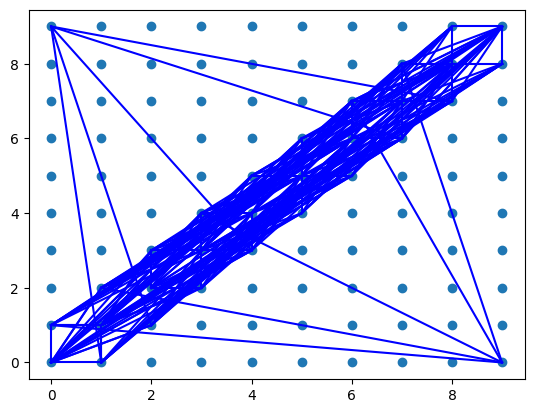

In [414]:
# Plotting maze 
r, c = np.meshgrid(np.arange(N), np.arange(N))
mesh_points = np.c_[r.ravel(), c.ravel()]

p1, p2 = np.where(mazeLap == 1)

f, ax = plt.subplots()

ax.scatter(x = mesh_points.T[0], y = mesh_points.T[1])

for i in range(len(p1)) :

    r1, r2 = p1[i] // N, p2[i] // N
    c1, c2 = p1[i] - r1 * N, p2[i] - r2 * N

    ax.plot([r1, c1], [r2, c2], color='b')


In [396]:
r

array([ 0,  1,  1,  2,  3,  4,  4,  5,  6,  6,  7,  8,  9, 10, 10, 10, 10,
       11, 11, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17,
       17, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 23, 23, 23, 24, 25, 25,
       26, 27, 27, 28, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 33, 33, 34,
       34, 34, 35, 35, 35, 36, 37, 37, 38, 39, 39, 40, 40, 40, 41, 41, 42,
       42, 42, 43, 44, 45, 45, 46, 46, 46, 46, 47, 48, 49, 50, 51, 51, 51,
       52, 52, 53, 54, 55, 55, 55, 56, 56, 57, 57, 58, 58, 59, 59, 60, 61,
       61, 61, 61, 62, 63, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67, 67, 68,
       68, 69, 69, 69, 70, 70, 71, 71, 71, 72, 73, 73, 73, 74, 74, 75, 75,
       76, 76, 76, 77, 77, 78, 79, 79, 79, 80, 80, 81, 81, 82, 82, 83, 84,
       84, 85, 85, 86, 86, 87, 87, 87, 88, 88, 89, 89, 90, 90, 91, 92, 93,
       94, 94, 94, 95, 95, 96, 96, 97, 97, 98, 99])

In [381]:
mazeLap - np.diag(np.diag(mazeLap))

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

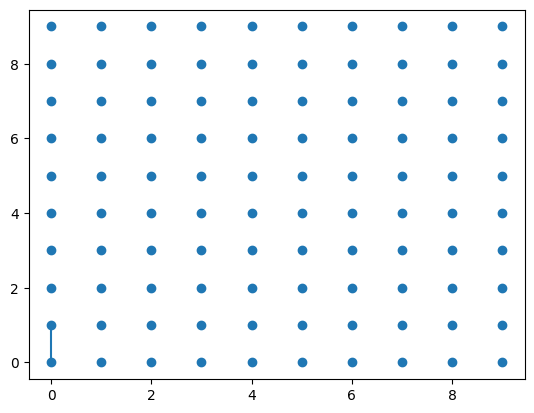

In [364]:
f, ax = plt.subplots()
ax.scatter(x = mesh_points.T[0], y = mesh_points.T[1])

for i, row in enumerate(mazeLap) :
    

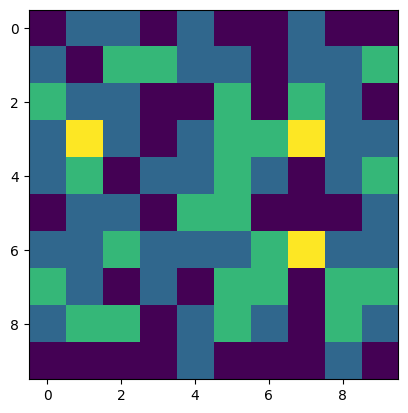

In [329]:
plt.imshow(-np.diag(mazeLap).reshape(N, N))

In [335]:
mazeLap[0].reshape(N, N)

array([[-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

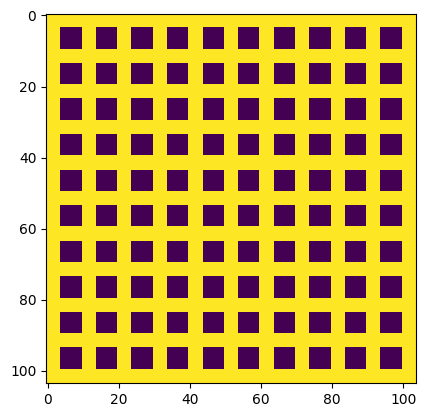

In [331]:
# Plotting maze 
r, c = np.meshgrid(np.arange(N), np.arange(N))
mesh_points = np.c_[r.ravel(), c.ravel()]

cell_size, pad_size = 10, 2
cell_arr = np.pad(np.zeros((cell_size-2*pad_size, cell_size-2*pad_size)), pad_width=pad_size, mode='constant', constant_values=1)
maze_arr = np.zeros(((cell_size)*N, (cell_size)*N))

# Getting edges 
indices = np.nonzero(mazeLap * np.diag([0]*N*N))
edges = [[x,y] for x, y in zip(*indices)]

# Looping through points to create maze array
for i, point in enumerate(mesh_points):
    maze_arr[(cell_size) * (i % N) : (cell_size) * ((i % N) + 1), (cell_size) * (i // N) : (cell_size) * ((i // N) + 1)] = cell_arr
    
for edge in edges : 
    p1, p2 = edge

    r1, r2 = p1 // N, p2 // N
    c1, c2 = p1 - r1 * N, p2 - r2 * N
    
    xs = (c1 * cell_size, c2 * cell_size)
    ys = (r1 * cell_size, r2 * cell_size)

    maze_arr[min(xs)+pad_size:max(xs)-pad_size, min(ys)+pad_size:min(ys)+cell_size-pad_size] = 0
    maze_arr[min(xs)+pad_size:min(xs)+cell_size-pad_size, min(ys)+pad_size:max(ys)-pad_size] = 0

plt.imshow(np.pad(maze_arr, pad_size, mode='constant', constant_values=1))

In [342]:
cells = [cell_arr for i in range(N*N)]
for cell in cells :
    

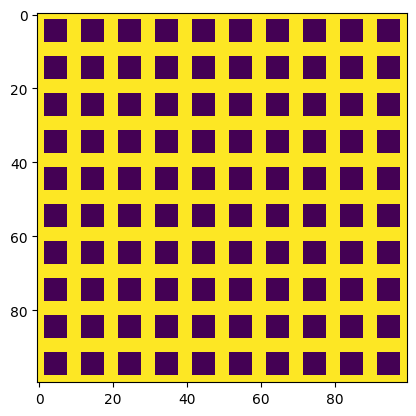

In [348]:
reshaped_arrays = np.array(cells).reshape(N, N, *cells[0].shape)
result = np.block([[reshaped_arrays[i, j] for j in range(N)] for i in range(N)])
plt.imshow(result) 

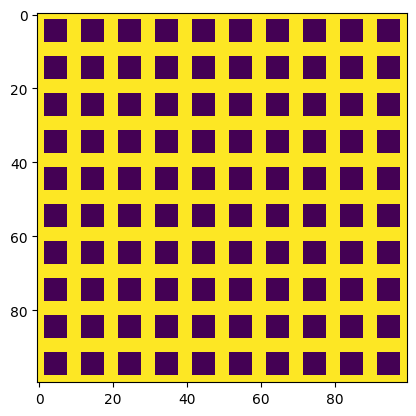

In [336]:
plt.imshow(np.pad(maze_arr, pad_size, mode='constant', constant_values=1))

In [178]:
cell_size, pad_size = 10, 1
cell_arr = np.pad(np.zeros((cell_size-2*pad_size, cell_size-2*pad_size)), pad_width=pad_size, mode='constant', constant_values=1)
N = 10  # Assuming mesh_points is a square grid
maze_arr = np.zeros(((cell_size)*N, (cell_size)*N))

for i, point in enumerate(mesh_points):
    maze_arr[(cell_size) * (i % N) : (cell_size) * ((i % N) + 1), (i // N) * (cell_size) : (cell_size) * ((i // N) + 1)] = cell_arr


In [159]:
cell_size = 
cell = np.ones()

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [8, 0],
       [9, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [8, 1],
       [9, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [8, 2],
       [9, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [8, 3],
       [9, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [8, 4],
       [9, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5],
       [6, 5],
       [7, 5],
       [8, 5],
       [9, 5],
       [0, 6],
       [1, 6],
       [2, 6],
       [3, 6],
       [4, 6],
       [5, 6],
       [6,

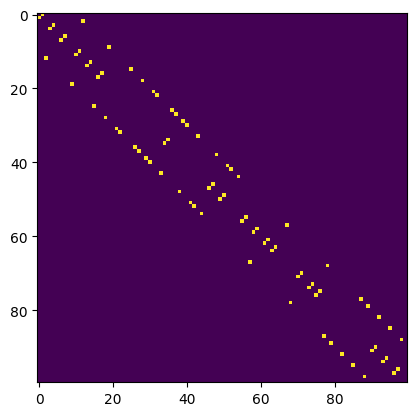

In [153]:
plt.imshow(mazeLap)

In [155]:
null_space(mazeLap).size

1800

In [121]:
graphLap.sum()

12.057741556721947

In [110]:
r, c = np.where(Laplacian == np.min(Laplacian[np.nonzero(Laplacian)]))
Laplacian[r[0],c[0]]

0.03231143660858204

In [97]:
np.argmin(Laplacian[np.nonzero(Laplacian)])

22

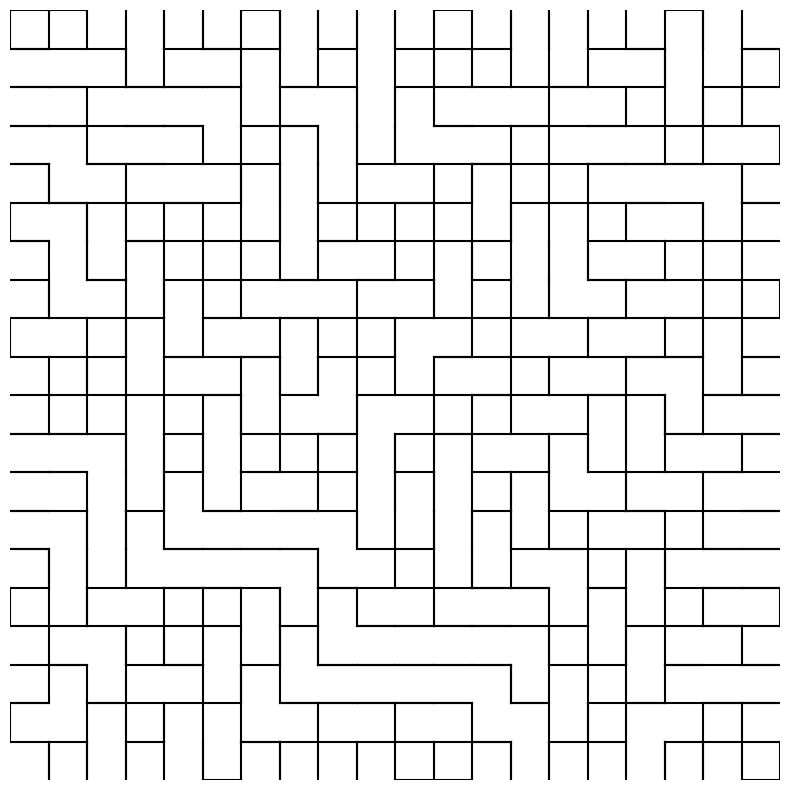

In [258]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Cell:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.visited = False
        self.walls = {'top': True, 'right': True, 'bottom': True, 'left': True}

def check_neighbours(grid, cell):
    neighbours = []

    # Get the indices of potential neighbours
    top = (cell.x, cell.y-1)
    right = (cell.x+1, cell.y)
    bottom = (cell.x, cell.y+1)
    left = (cell.x-1, cell.y)

    for x, y in [top, right, bottom, left]:
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
            neighbour = grid[x][y]
            if not neighbour.visited:
                neighbours.append(neighbour)

    if len(neighbours):
        return random.choice(neighbours)
    else:
        return None

def generate_maze(size):
    grid = [[Cell(x, y) for y in range(size)] for x in range(size)]
    stack = []

    start_cell = grid[0][0]
    current = start_cell
    current.visited = True
    stack.append(current)

    while stack:
        next_cell = check_neighbours(grid, current)

        if next_cell:
            next_cell.visited = True
            stack.append(next_cell)

            # Remove wall between current and chosen cell
            dx = next_cell.x - current.x
            if dx == 1:
                current.walls['right'] = False
                next_cell.walls['left'] = False
            elif dx == -1:
                current.walls['left'] = False
                next_cell.walls['right'] = False

            dy = next_cell.y - current.y
            if dy == 1:
                current.walls['bottom'] = False
                next_cell.walls['top'] = False
            elif dy == -1:
                current.walls['top'] = False
                next_cell.walls['bottom'] = False

            current = next_cell
        else:
            current = stack.pop()

    return grid

def plot_maze(grid):
    fig, ax = plt.subplots(figsize=(10,10))
    for x in range(len(grid)):
        for y in range(len(grid[0])):
            cell = grid[x][y]
            if cell.walls['top']:
                ax.plot([y, y+1], [x, x], color="k")
            if cell.walls['right']:
                ax.plot([y+1, y+1], [x, x+1], color="k")
            if cell.walls['bottom']:
                ax.plot([y, y+1], [x+1, x+1], color="k")
            if cell.walls['left']:
                ax.plot([y, y], [x, x+1], color="k")

    ax.set_xlim(0, len(grid))
    ax.set_ylim(0, len(grid[0]))
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()  # to match grid coordinates
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
    maze_size = 20
    maze = generate_maze(maze_size)
    plot_maze(maze)


In [8]:
vertices.reshape(N,N)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [3]:
import random

# Dimensions of the maze
WIDTH, HEIGHT = 10, 10

# Directions to move in the maze
DIRECTIONS = [(1, 0), (0, 1), (-1, 0), (0, -1)]

def in_bounds(x, y):
    """Check if (x, y) is inside the maze."""
    return 0 <= x < WIDTH and 0 <= y < HEIGHT

def generate_maze():
    maze = [[False for _ in range(WIDTH)] for _ in range(HEIGHT)]
    visited = [[False for _ in range(WIDTH)] for _ in range(HEIGHT)]

    # Randomly choose a starting point
    start_x, start_y = random.randint(0, WIDTH-1), random.randint(0, HEIGHT-1)
    visited[start_y][start_x] = True
    stack = [(start_x, start_y)]

    while stack:
        x, y = stack[-1]
        neighbors = []

        # Check all directions
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if in_bounds(nx, ny) and not visited[ny][nx]:
                neighbors.append((nx, ny))

        if neighbors:
            # Choose one of the unvisited neighbors
            nx, ny = random.choice(neighbors)
            maze[y][x] = (nx, ny)
            visited[ny][nx] = True
            stack.append((nx, ny))
        else:
            # Backtrack
            stack.pop()

    return maze

maze = generate_maze()
for row in maze:
    print(row)


[False, (0, 0), False, (3, 1), (3, 0), (4, 0), (6, 1), (6, 0), (9, 0), (9, 1)]
[(1, 1), (1, 0), (2, 2), (2, 1), False, (5, 0), (6, 2), False, (8, 0), False]
[(0, 3), (0, 2), (3, 2), (4, 2), (4, 1), (5, 1), (7, 2), (7, 3), (8, 1), (8, 2)]
[(1, 3), (1, 4), (3, 3), (4, 3), (5, 3), (5, 2), False, (8, 3), (8, 4), (9, 2)]
[False, (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (7, 5), False, (9, 3)]
[(1, 5), (2, 5), (3, 5), (3, 6), (4, 6), (6, 5), False, (8, 5), (9, 5), (9, 6)]
[(0, 5), (0, 6), (2, 7), (2, 6), (4, 7), (5, 5), (5, 6), (6, 6), (8, 7), (9, 7)]
[(0, 8), (1, 6), (3, 7), (3, 8), (4, 8), False, (7, 7), (7, 6), False, (9, 8)]
[(0, 9), (1, 7), False, (2, 8), (4, 9), (5, 7), (6, 7), (6, 8), (8, 9), (8, 8)]
[False, (1, 8), (1, 9), (2, 9), (5, 9), (5, 8), False, (7, 8), (9, 9), False]
